In [ ]:
!pip install datasets scikit-learn matplotlib seaborn wordcloud

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datasets import load_dataset

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
    precision_recall_curve
)

from wordcloud import WordCloud

In [2]:
from datasets import load_dataset

dataset = load_dataset("tanaos/synthetic-topic-classification-dataset-v1")




/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

train_data.csv: 0.00B [00:00, ?B/s]

Generating train split:   0%|          | 0/10232 [00:00<?, ? examples/s]

In [3]:
df = pd.DataFrame(dataset["train"])
df.head()


,text,labels
0,The rise of populist movements has reshaped gl...,0
1,A balanced diet rich in fruits and vegetables ...,1
2,Quantum cryptography is revolutionizing secure...,2
3,Streaming platforms have transformed how audie...,3
4,Crypto investors are diversifying portfolios a...,4


In [4]:
print("Total samples:", len(df))

Total samples: 10232


In [5]:
print("Total samples:", len(df))
print("Unique topic labels:", df["labels"].nunique())
df["labels"].value_counts()


Total samples: 10232
Unique topic labels: 15


,count
labels,
1,1157
2,1023
8,883
3,833
4,788
11,758
6,680
10,639
9,638


In [6]:
topic_labels = [
    "politics",
    "health",
    "technology",
    "entertainment",
    "money_finance",
    "relationships",
    "education_learning",
    "work_careers",
    "science",
    "society_culture",
    "gaming",
    "lifestyle_hobbies",
    "sports",
    "automotive",
    "other"
]

df["topic"] = df["labels"].apply(lambda x: topic_labels[x])
df.head()


,text,labels,topic
0,The rise of populist movements has reshaped gl...,0,politics
1,A balanced diet rich in fruits and vegetables ...,1,health
2,Quantum cryptography is revolutionizing secure...,2,technology
3,Streaming platforms have transformed how audie...,3,entertainment
4,Crypto investors are diversifying portfolios a...,4,money_finance


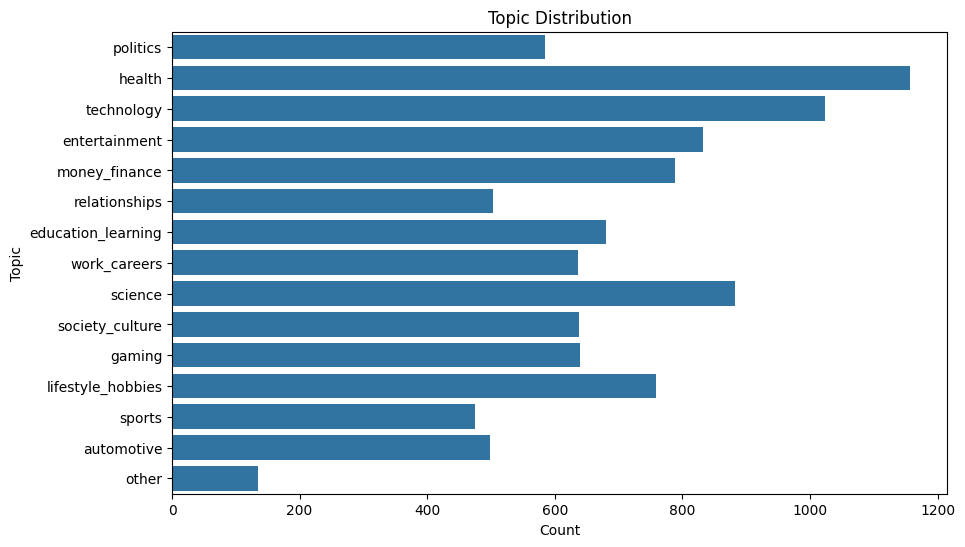

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(y=df["topic"])
plt.title("Topic Distribution")
plt.xlabel("Count")
plt.ylabel("Topic")
plt.show()


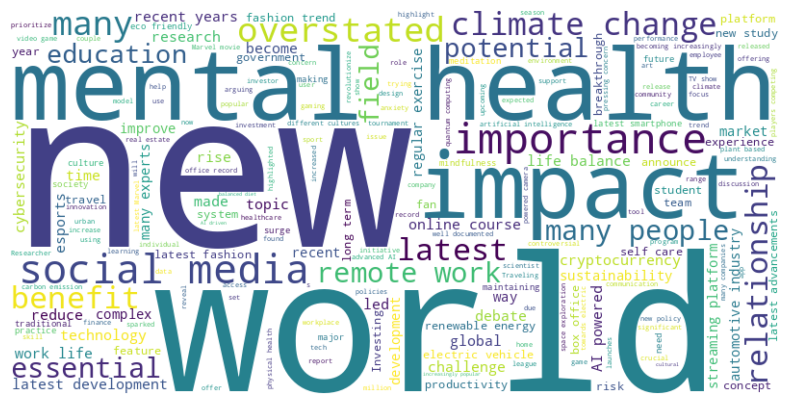

In [9]:
all_text = " ".join(df["text"])

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white"
).generate(all_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [10]:
X = df["text"]
y = df["labels"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 8185
Testing samples: 2047


In [11]:
tfidf = TfidfVectorizer(
    stop_words="english",
    max_features=5000,
    ngram_range=(1,2)
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF Train Shape:", X_train_tfidf.shape)


TF-IDF Train Shape: (8185, 5000)


In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [20]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)

lr_preds = lr.predict(X_test_tfidf)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print(classification_report(y_test, lr_preds))

Logistic Regression Accuracy: 0.8944797264289204
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       117
           1       0.89      0.94      0.91       231
           2       0.80      0.91      0.85       205
           3       0.91      0.92      0.91       167
           4       0.95      0.94      0.95       158
           5       0.93      0.84      0.88       100
           6       0.93      0.94      0.94       136
           7       0.88      0.89      0.89       127
           8       0.85      0.90      0.87       177
           9       0.82      0.76      0.79       127
          10       0.96      0.98      0.97       128
          11       0.88      0.85      0.86       152
          12       0.97      0.94      0.95        95
          13       0.98      0.95      0.96       100
          14       1.00      0.15      0.26        27

    accuracy                           0.89      2047
   macro avg       0.91      0.

In [21]:
svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)

svm_preds = svm.predict(X_test_tfidf)

print("SVM Accuracy:", accuracy_score(y_test, svm_preds))
print(classification_report(y_test, svm_preds))

SVM Accuracy: 0.8969223253541768
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       117
           1       0.90      0.93      0.91       231
           2       0.84      0.90      0.87       205
           3       0.90      0.92      0.91       167
           4       0.96      0.94      0.95       158
           5       0.92      0.88      0.90       100
           6       0.93      0.94      0.94       136
           7       0.88      0.91      0.89       127
           8       0.85      0.90      0.87       177
           9       0.83      0.76      0.80       127
          10       0.97      0.98      0.97       128
          11       0.89      0.84      0.86       152
          12       0.97      0.94      0.95        95
          13       0.95      0.97      0.96       100
          14       0.50      0.22      0.31        27

    accuracy                           0.90      2047
   macro avg       0.88      0.86      0.87    

In [22]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

nb_preds = nb.predict(X_test_tfidf)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_preds))
print(classification_report(y_test, nb_preds, zero_division=0))

Naive Bayes Accuracy: 0.8768930141670738
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       117
           1       0.83      0.95      0.89       231
           2       0.79      0.91      0.85       205
           3       0.92      0.92      0.92       167
           4       0.94      0.91      0.93       158
           5       0.93      0.75      0.83       100
           6       0.91      0.93      0.92       136
           7       0.86      0.87      0.87       127
           8       0.86      0.88      0.87       177
           9       0.78      0.71      0.74       127
          10       0.96      0.96      0.96       128
          11       0.84      0.82      0.83       152
          12       0.99      0.93      0.96        95
          13       0.98      0.94      0.96       100
          14       0.00      0.00      0.00        27

    accuracy                           0.88      2047
   macro avg       0.83      0.82      

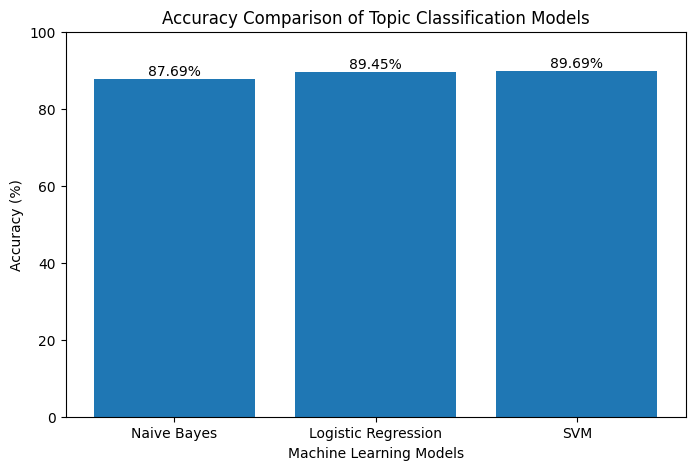

In [23]:
models = ['Naive Bayes', 'Logistic Regression', 'SVM']
accuracies = [
    0.8768930141670738 * 100,
    0.8944797264289204 * 100,
    0.8969223253541768 * 100
]

plt.figure(figsize=(8,5))
bars = plt.bar(models, accuracies)

plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.xlabel('Machine Learning Models')
plt.title('Accuracy Comparison of Topic Classification Models')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 1,
        f'{height:.2f}%',
        ha='center',
        fontsize=10
    )

plt.show()


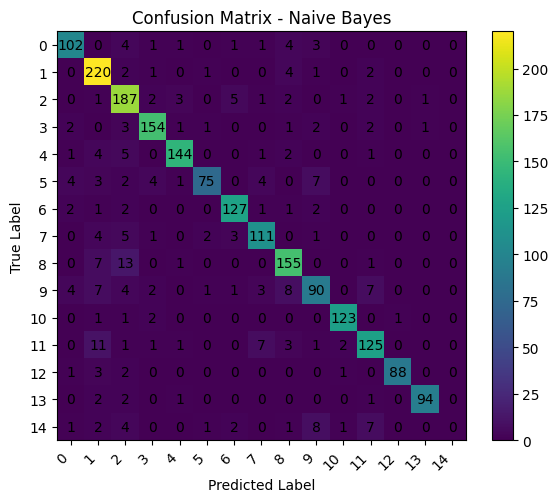

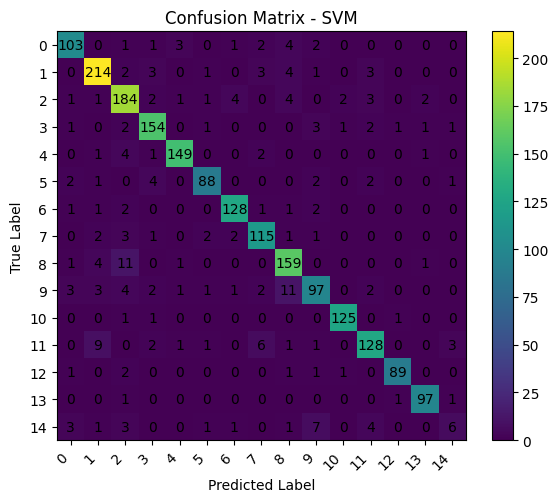

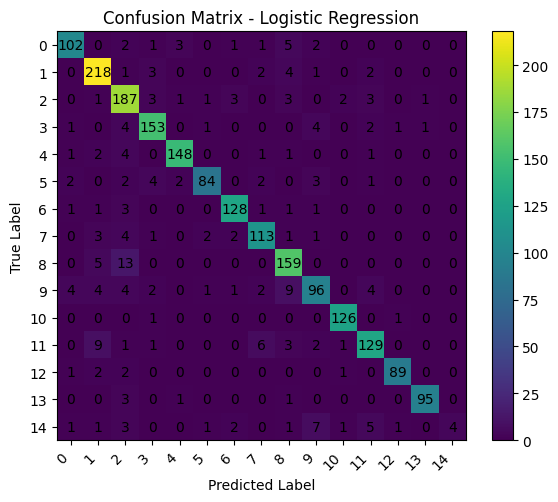

In [16]:
def plot_confusion_matrix(cm, class_names, title):
    plt.figure(figsize=(6,5))
    plt.imshow(cm)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45, ha="right")
    plt.yticks(tick_marks, class_names)

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha="center", va="center")

    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

cm_nb = confusion_matrix(y_test, nb_preds)

plot_confusion_matrix(
    cm_nb,
    class_names=nb.classes_,
    title="Confusion Matrix - Naive Bayes"
)

cm_svm = confusion_matrix(y_test, svm_preds)

plot_confusion_matrix(
    cm_svm,
    class_names=svm.classes_,
    title="Confusion Matrix - SVM"
)

cm_lr = confusion_matrix(y_test, lr_preds)

plot_confusion_matrix(
    cm_lr,
    class_names=lr.classes_,
    title="Confusion Matrix - Logistic Regression"
)


In [25]:

sample_texts = [
    "The government announced a new education policy for universities",
    "The stock market crashed due to inflation and rising interest rates",
    "The football team won the championship after a dramatic final match",
    "New AI models are transforming healthcare diagnostics"
]

# Transform text using trained TF-IDF
sample_tfidf = tfidf.transform(sample_texts)

# Predictions
lr_sample_preds = lr.predict(sample_tfidf)
svm_sample_preds = svm.predict(sample_tfidf)
nb_sample_preds  = nb.predict(sample_tfidf)

# Print predictions with topic names
for i, text in enumerate(sample_texts):
    print(f"Text: {text}")
    print(f"Naive Bayes Prediction: {topic_labels[nb_sample_preds[i]]}")
    print(f"Logistic Regression Prediction: {topic_labels[lr_sample_preds[i]]}")
    print(f"SVM Prediction: {topic_labels[svm_sample_preds[i]]}")
    print("-" * 50)




Text: The government announced a new education policy for universities
Naive Bayes Prediction: education_learning
Logistic Regression Prediction: education_learning
SVM Prediction: education_learning
--------------------------------------------------
Text: The stock market crashed due to inflation and rising interest rates
Naive Bayes Prediction: money_finance
Logistic Regression Prediction: money_finance
SVM Prediction: money_finance
--------------------------------------------------
Text: The football team won the championship after a dramatic final match
Naive Bayes Prediction: sports
Logistic Regression Prediction: sports
SVM Prediction: sports
--------------------------------------------------
Text: New AI models are transforming healthcare diagnostics
Naive Bayes Prediction: technology
Logistic Regression Prediction: technology
SVM Prediction: technology
--------------------------------------------------
